# Ford GoBike System Data Exploration
## by Shehab Eldin Tarek Abass

### Preliminary Wrangling

> **<span style="color:darkblue">This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.**

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from datetime import datetime

%matplotlib inline

In [2]:
bike=pd.read_csv('2017-fordgobike-tripdata.csv')

In [3]:
print(bike.shape)
print(bike.info())
bike.head()

(519700, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519700 entries, 0 to 519699
Data columns (total 13 columns):
duration_sec               519700 non-null int64
start_time                 519700 non-null object
end_time                   519700 non-null object
start_station_id           519700 non-null int64
start_station_name         519700 non-null object
start_station_latitude     519700 non-null float64
start_station_longitude    519700 non-null float64
end_station_id             519700 non-null int64
end_station_name           519700 non-null object
end_station_latitude       519700 non-null float64
end_station_longitude      519700 non-null float64
bike_id                    519700 non-null int64
user_type                  519700 non-null object
dtypes: float64(4), int64(4), object(5)
memory usage: 51.5+ MB
None


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type
0,80110,2017-12-31 16:57:39.6540,2018-01-01 15:12:50.2450,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer
1,78800,2017-12-31 15:56:34.8420,2018-01-01 13:49:55.6170,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,37.766210,-122.426614,88,Customer
2,45768,2017-12-31 22:45:48.4110,2018-01-01 11:28:36.8830,245,Downtown Berkeley BART,37.870348,-122.267764,245,Downtown Berkeley BART,37.870348,-122.267764,1094,Customer
3,62172,2017-12-31 17:31:10.6360,2018-01-01 10:47:23.5310,60,8th St at Ringold St,37.774520,-122.409449,5,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,2831,Customer
4,43603,2017-12-31 14:23:14.0010,2018-01-01 02:29:57.5710,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247,Fulton St at Bancroft Way,37.867789,-122.265896,3167,Subscriber


#### What is the structure of your dataset?

> <span style="color:darkblue">519700 Rows with 13 columns.

#### What is/are the main feature(s) of interest in your dataset?

> <span style="color:darkblue">When are most trips taken in terms of time of day, day of the week, or month of the year?

> <span style="color:darkblue">How long does the average trip take?

> <span style="color:darkblue">Does the above depend on if a user is a subscriber or customer?

#### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> <span style="color:darkblue">user_type , start end location , Time , duration.

In [4]:
bike.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id
count,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000
mean,1099.009521,95.034245,37.771653,-122.363927,92.184041,37.771844,-122.363236,1672.533079
std,3444.146451,86.083078,0.086305,0.105573,84.969491,0.086224,0.105122,971.356959
min,61.000000,3.000000,37.317298,-122.444293,3.000000,37.317298,-122.444293,10.000000
25%,382.000000,24.000000,37.773492,-122.411726,23.000000,37.774520,-122.410345,787.000000
50%,596.000000,67.000000,37.783521,-122.398870,66.000000,37.783830,-122.398525,1728.500000
75%,938.000000,139.000000,37.795392,-122.391034,134.000000,37.795392,-122.391034,2520.000000
max,86369.000000,340.000000,37.880222,-121.874119,340.000000,37.880222,-121.874119,3733.000000


In [5]:
bike.nunique()

duration_sec                13490
start_time                 519688
end_time                   519681
start_station_id              272
start_station_name            272
start_station_latitude        272
start_station_longitude       272
end_station_id                272
end_station_name              272
end_station_latitude          272
end_station_longitude         272
bike_id                      3673
user_type                       2
dtype: int64

> <span style="color:darkblue">3673 bikes <br/>
> <span style="color:darkblue">272 start location<br/>
> <span style="color:darkblue">272 end location<br/>
> <span style="color:darkblue">2 types of users <br/>
> <span style="color:darkblue">Only 13490 duration unique.. with seconds' precision !

In [6]:
bike['route']=bike["start_station_id"].astype('str')+","+bike["end_station_id"].astype('str')

In [7]:
bike['route_names']=bike["start_station_name"]+" , "+bike["end_station_name"]

In [8]:
bike["start_time"][0]

'2017-12-31 16:57:39.6540'

In [9]:
datetime.strptime(bike["start_time"][0],"%Y-%m-%d %H:%M:%S.%f")

datetime.datetime(2017, 12, 31, 16, 57, 39, 654000)

In [10]:
bike["start_time"]=bike["start_time"].apply(lambda x:datetime.strptime(x,"%Y-%m-%d %H:%M:%S.%f"))
#bike["start_time"]=bike["start_time"].apply(lambda x:datetime.timestamp(x))

In [11]:
bike["end_time"]=bike["end_time"].apply(lambda x:datetime.strptime(x,"%Y-%m-%d %H:%M:%S.%f"))
#bike["end_time"]=bike["end_time"].apply(lambda x:datetime.timestamp(x))

In [12]:
bike["month"]=bike["start_time"].apply(lambda x:x.month)
bike["day"]=bike["start_time"].apply(lambda x:x.day)
bike["hour"]=bike["start_time"].apply(lambda x:x.hour)
bike["weekday"]=bike["start_time"].apply(lambda x:x.strftime('%A'))

In [13]:
bike.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,route,route_names,month,day,hour,weekday
0,80110,2017-12-31 16:57:39.654,2018-01-01 15:12:50.245,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer,"74,43","Laguna St at Hayes St , San Francisco Public L...",12,31,16,Sunday
1,78800,2017-12-31 15:56:34.842,2018-01-01 13:49:55.617,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,37.766210,-122.426614,88,Customer,"284,96",Yerba Buena Center for the Arts (Howard St at ...,12,31,15,Sunday
2,45768,2017-12-31 22:45:48.411,2018-01-01 11:28:36.883,245,Downtown Berkeley BART,37.870348,-122.267764,245,Downtown Berkeley BART,37.870348,-122.267764,1094,Customer,"245,245","Downtown Berkeley BART , Downtown Berkeley BART",12,31,22,Sunday
3,62172,2017-12-31 17:31:10.636,2018-01-01 10:47:23.531,60,8th St at Ringold St,37.774520,-122.409449,5,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,2831,Customer,"60,5","8th St at Ringold St , Powell St BART Station ...",12,31,17,Sunday
4,43603,2017-12-31 14:23:14.001,2018-01-01 02:29:57.571,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247,Fulton St at Bancroft Way,37.867789,-122.265896,3167,Subscriber,"239,247","Bancroft Way at Telegraph Ave , Fulton St at B...",12,31,14,Sunday


In [14]:
bike.nunique()

duration_sec                13490
start_time                 519688
end_time                   519681
start_station_id              272
start_station_name            272
start_station_latitude        272
start_station_longitude       272
end_station_id                272
end_station_name              272
end_station_latitude          272
end_station_longitude         272
bike_id                      3673
user_type                       2
route                       20027
route_names                 20027
month                           7
day                            31
hour                           24
weekday                         7
dtype: int64

## Univariate Exploration

### Ride Duration

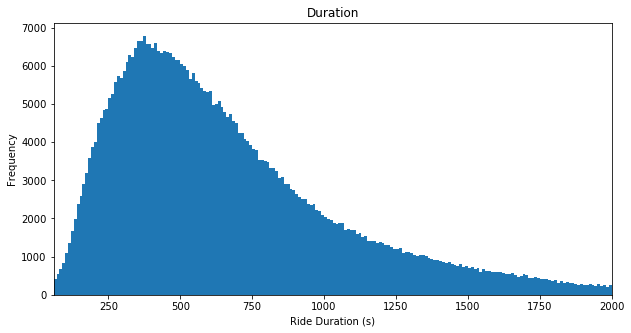

In [15]:
plt.figure(figsize=(10,5))
bins=np.arange(60,2000+10,10)
plt.hist(data=bike,x='duration_sec',bins=bins);
plt.xlim(60,2000);
plt.xlabel("Ride Duration (s)");
plt.ylabel("Frequency");
plt.title("Duration");

**<span style="color:darkblue">Right-skewed distribution as expected. Most durations between 250-750 seconds**

### Which bikes were frequently used?

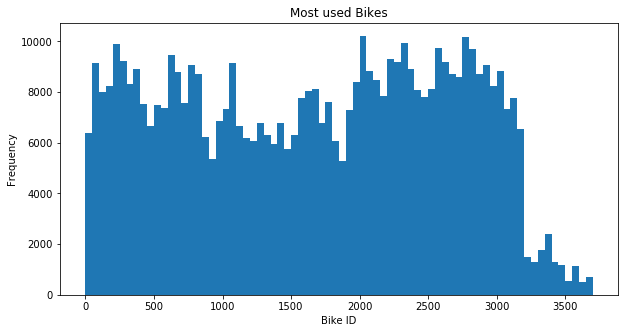

In [16]:
plt.figure(figsize=(10,5))
bins=np.arange(0,3673+50,50)
plt.hist(data=bike,x='bike_id',bins=bins);
plt.xlabel("Bike ID");
plt.ylabel("Frequency");
plt.title("Most used Bikes");

**<span style="color:darkblue">This distribution shows a lot of spikes. but the last 300 bikes weren't used like the other. That's because it's share-system. When someone finishes riding it return the bike and another customer come and take the bike by "smallest id" existing. So it's a bit hard to reach the id No.3000 bike and that needs a lot of customers using all the existing bikes.**<br/>
**<span style="color:darkblue">or it's added to the system recently. needs further exploration.**

### Routes

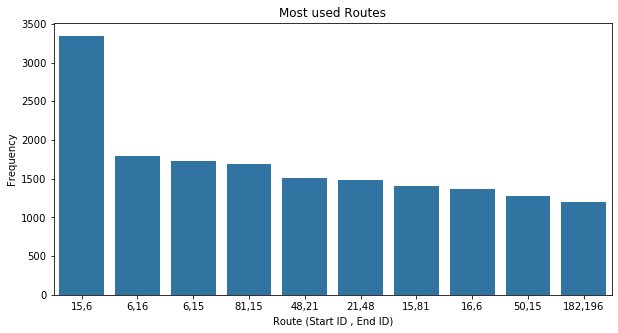

In [17]:
plt.figure(figsize=(10,5))
color=sb.color_palette()[0]
route_plt=bike["route"].value_counts()
sb.barplot(x=route_plt.index[:10],y=route_plt[:10],color=color)
plt.ylabel("Frequency");
plt.xlabel("Route (Start ID , End ID)")
plt.title("Most used Routes");

In [18]:
bike["route_names"].value_counts()[:10]

San Francisco Ferry Building (Harry Bridges Plaza) , The Embarcadero at Sansome St          3344
The Embarcadero at Sansome St , Steuart St at Market St                                     1793
The Embarcadero at Sansome St , San Francisco Ferry Building (Harry Bridges Plaza)          1734
Berry St at 4th St , San Francisco Ferry Building (Harry Bridges Plaza)                     1686
2nd St at S Park St , Montgomery St BART Station (Market St at 2nd St)                      1509
Montgomery St BART Station (Market St at 2nd St) , 2nd St at S Park St                      1485
San Francisco Ferry Building (Harry Bridges Plaza) , Berry St at 4th St                     1401
Steuart St at Market St , The Embarcadero at Sansome St                                     1361
2nd St at Townsend St - Coming Soon , San Francisco Ferry Building (Harry Bridges Plaza)    1274
19th Street BART Station , Grand Ave at Perkins St                                          1196
Name: route_names, dtype: int6

**<span style="color:darkblue">The most used route is from Harry Bridges Plaza to The Embarcadera at Sansome St.**

### User_Type

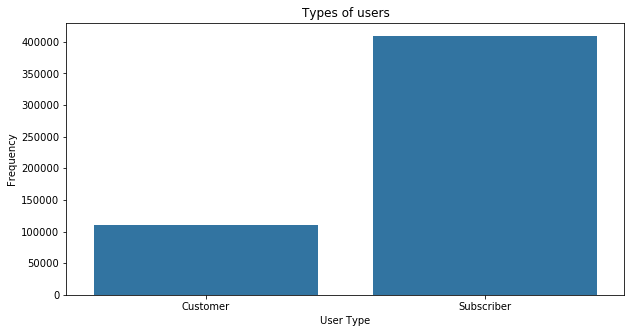

In [19]:
plt.figure(figsize=(10,5))
sb.countplot(data=bike,x='user_type',color=color);
plt.xlabel("User Type");
plt.ylabel("Frequency");
plt.title("Types of users");

**<span style="color:darkblue">More than 75% of people are Subscribers. I think riding bikes is a routine for a lot of people in San Francisco.**

### Month, Weekday, Day and hour of the day.

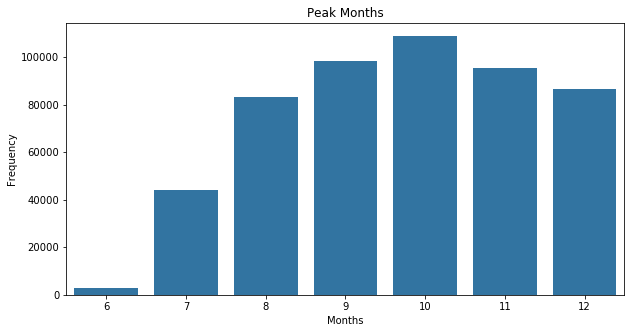

In [20]:
plt.figure(figsize=(10,5))
sb.countplot(data=bike,x='month',color=color);
plt.ylabel("Frequency");
plt.xlabel("Months");
plt.title("Peak Months");

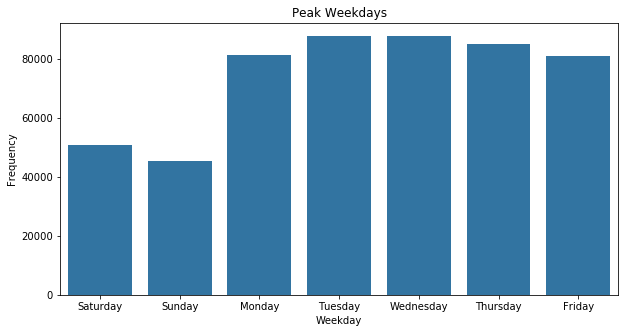

In [21]:
plt.figure(figsize=(10,5))
sb.countplot(data=bike,x='weekday',color=color,order =["Saturday","Sunday","Monday","Tuesday","Wednesday","Thursday","Friday"]);
plt.ylabel("Frequency");
plt.xlabel("Weekday");
plt.title("Peak Weekdays");

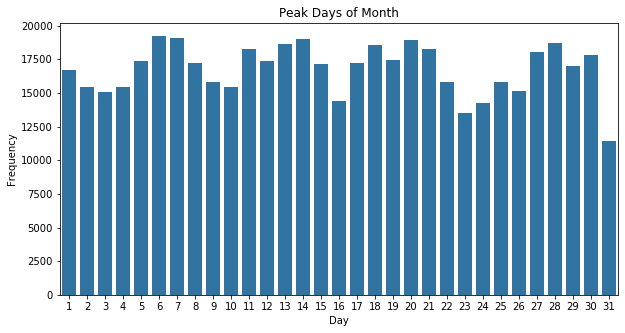

In [22]:
plt.figure(figsize=(10,5))
sb.barplot(x=bike.day.value_counts().sort_index().index,y=bike.day.value_counts().sort_index(),color=color);
plt.ylabel("Frequency");
plt.xlabel("Day");
plt.title("Peak Days of Month");

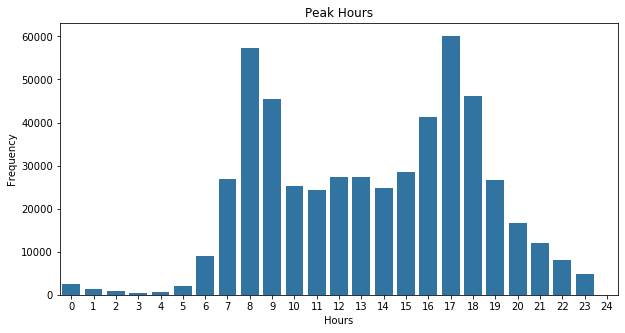

In [23]:
plt.figure(figsize=(10,5))
sb.countplot(data=bike,x='hour',order=range(0,25),color=color)
plt.ylabel("Frequency");
plt.xlabel("Hours");
plt.title("Peak Hours");

>**<span style="color:darkblue">Last quarter of the year seems to have the most activity.**<br/>
>**<span style="color:darkblue">Weekends are low compared to the rest.**<br/>
>**<span style="color:darkblue">Days of month follow the previous pattern.**<br/>
>**<span style="color:darkblue">Hours are bimodal. 8:00 AM and 5:00 PM are the peak hours of riding bike**<br/>

#### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> **<span style="color:darkblue">Mainly, the distributions were right-skewed.<br/>**
> **<span style="color:darkblue">There was a big drop in Used bike after 3000 bikes.<br/>**
> **<span style="color:darkblue">I Didn't need to preform any transformation.<br/>**

#### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> **<span style="color:darkblue">I changed start time and end time type to datetime format so I can track months and years easily.<br/>**
> **<span style="color:darkblue">I added a new column 'route' to compare start and end locations simultaneously.**
> **<span style="color:darkblue">I added (Month, Day , Weekday and Hour) columns for Time Analysis.**

## Bivariate Exploration


### Customer Duration vs Subscriber Duration

In [24]:
customer=bike[bike["user_type"]=="Customer"]
subscriber=bike[bike["user_type"]=="Subscriber"]

In [25]:
print(customer['duration_sec'].describe())
print(subscriber['duration_sec'].describe())

count    110470.000000
mean       2557.445786
std        6355.311637
min          61.000000
25%         667.000000
50%        1086.000000
75%        1754.000000
max       86369.000000
Name: duration_sec, dtype: float64
count    409230.000000
mean        705.310490
std        1852.582653
min          61.000000
25%         350.000000
50%         529.000000
75%         782.000000
max       86075.000000
Name: duration_sec, dtype: float64


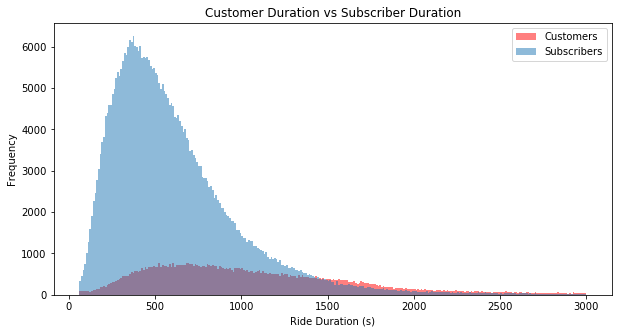

In [26]:
bins=np.arange(60,3000+10,10)
plt.figure(figsize=(10,5))
plt.hist(data=customer,x='duration_sec',bins=bins,alpha=0.5,color='r');
plt.hist(data=subscriber,x='duration_sec',bins=bins,alpha=0.5,color=color);
plt.legend(["Customers","Subscribers"]);
plt.xlabel("Ride Duration (s)");
plt.ylabel("Frequency");
plt.title("Customer Duration vs Subscriber Duration");

**<span style="color:darkblue">The above plot is baised because around 80% of data population is subscribers.**<br/>
**<span style="color:darkblue">Let's take an equal sample with size of 10000 and plot the result.**<br/>

In [27]:
s_cost=customer.sample(150000,replace=True)
s_subs=subscriber.sample(150000,replace=True)

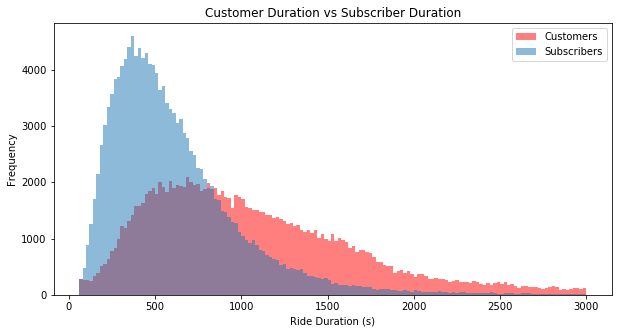

In [28]:
bins=np.arange(60,3000+20,20)
plt.figure(figsize=(10,5))
plt.hist(data=s_cost,x='duration_sec',bins=bins,alpha=0.5,color='r');
plt.hist(data=s_subs,x='duration_sec',bins=bins,alpha=0.5,color=color);
plt.legend(["Customers","Subscribers"]);
plt.xlabel("Ride Duration (s)");
plt.ylabel("Frequency");
plt.title("Customer Duration vs Subscriber Duration");

**<span style="color:darkblue">The plot is showing that Subscribers go for short rides and Customers go for long rides.**

### Routes

In [29]:
s_cost=customer.sample(150000,replace=True)
s_subs=subscriber.sample(150000,replace=True)
bike_sub=s_cost.append(s_subs)

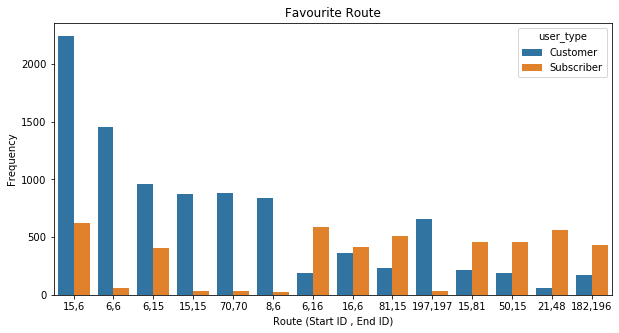

In [30]:
plt.figure(figsize=(10,5))
sb.countplot(data=bike_sub,x='route',order=bike_sub.route.value_counts()[:14].index,hue='user_type');
plt.ylabel("Frequency");
plt.xlabel("Route (Start ID , End ID)");
plt.title("Favourite Route");

In [31]:
bike_sub.route_names.value_counts()[:14]

San Francisco Ferry Building (Harry Bridges Plaza) , The Embarcadero at Sansome St                         2862
The Embarcadero at Sansome St , The Embarcadero at Sansome St                                              1515
The Embarcadero at Sansome St , San Francisco Ferry Building (Harry Bridges Plaza)                         1371
San Francisco Ferry Building (Harry Bridges Plaza) , San Francisco Ferry Building (Harry Bridges Plaza)     912
Central Ave at Fell St , Central Ave at Fell St                                                             911
The Embarcadero at Vallejo St , The Embarcadero at Sansome St                                               863
The Embarcadero at Sansome St , Steuart St at Market St                                                     783
Steuart St at Market St , The Embarcadero at Sansome St                                                     770
Berry St at 4th St , San Francisco Ferry Building (Harry Bridges Plaza)                                 

**<span style="color:darkblue">For an equal sample between subscribers and customers,<br/>**
>**<span style="color:darkblue">The first half of top routes are taken by customers.**<br/>
>**<span style="color:darkblue">The second half of top routes are taken by subscribers.**<br/>

**<span style="color:darkblue">It look like new customers get recommendation about some routes and the subscribers already have a private route for themselves.**

### Time Analysis between Customers and Subscribers

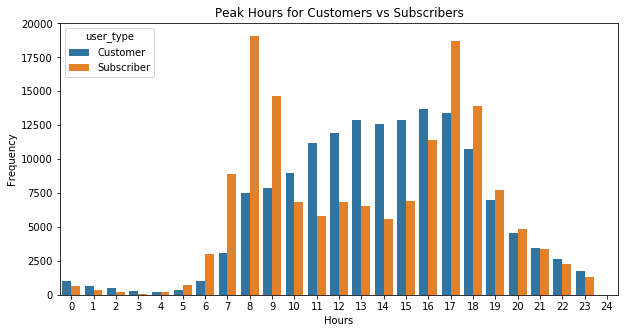

In [32]:
plt.figure(figsize=(10,5))
sb.countplot(data=bike_sub,x='hour',order=range(0,25),hue='user_type')
plt.ylabel("Frequency");
plt.xlabel("Hours");
plt.title("Peak Hours for Customers vs Subscribers");

>**<span style="color:darkblue"> (from 6 to 9 AM) ; going to work or school, Subscribers are more in the data.**<br/>
>**<span style="color:blue"> (from 5 to 9 PM) ; going back from work or collage, Subscribers are more in the data.**<br/>
>**<span style="color:darkblue">  Customers are more present in the rest of the hours.**<br/>

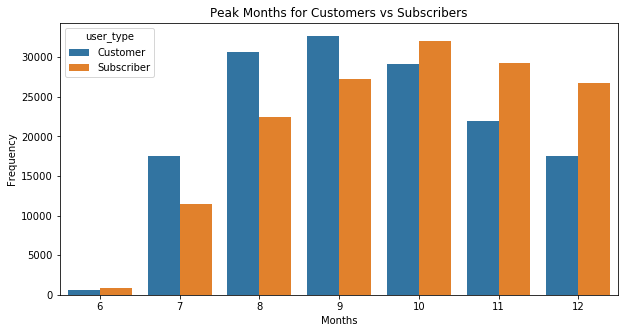

In [33]:
plt.figure(figsize=(10,5))
sb.countplot(data=bike_sub,x='month',hue='user_type')
plt.ylabel("Frequency");
plt.xlabel("Months");
plt.title("Peak Months for Customers vs Subscribers");

>**<span style="color:darkblue"> In October ,November and December, Subscribers are more present in the data.**<br/>
    >**<span style="color:darkblue"> In June, July and Augest, Customers are more present in the data.**<br/>

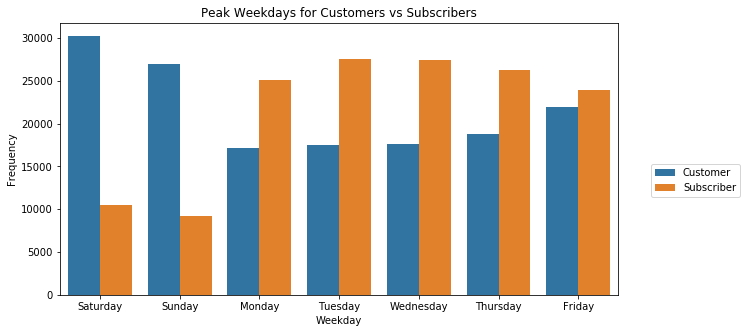

In [34]:
plt.figure(figsize=(10,5))
sb.countplot(data=bike_sub,x='weekday',hue='user_type',order =["Saturday","Sunday","Monday","Tuesday","Wednesday","Thursday","Friday"])
plt.ylabel("Frequency");
plt.xlabel("Weekday");
plt.legend(bbox_to_anchor=(1.05, 0.5), loc=2);
plt.title("Peak Weekdays for Customers vs Subscribers");

>**<span style="color:darkblue"> On Weekends, Customers are more present.**<br/>
    >**<span style="color:darkblue"> On Workdays, subscribers are more present.**<br/>

**<span style="color:darkblue">From the above. You can gent an idea about who is a customer and who is a subscriber.**<br/>
>**<span style="color:darkblue">A customer is the person who don't have a routine or a place to go regularly (Everyday).**<br/>
>**<span style="color:darkblue">A subscriber is the person who have work or school and want to ride bike to the destination (Everyday).**<br/>

###### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> **<span style="color:darkblue">Customers tends to take long rides and subscribers tends to take short rides.**<br/>
> **<span style="color:darkblue">Customer is more like to be a tourist or a person having fun riding a bike.**<br/>
> **<span style="color:darkblue">Subscriber is more like to be a worker or a student in school or collage.**<br/>

## Multivariate Exploration



c:\users\omar\appdata\local\programs\python\python37\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
c:\users\omar\appdata\local\programs\python\python37\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


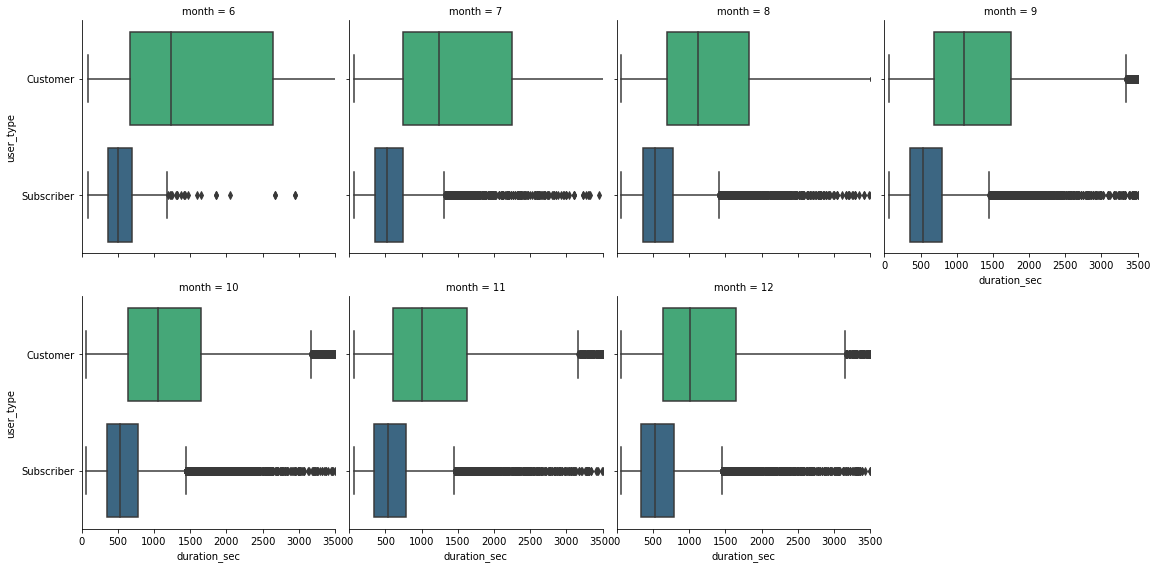

In [35]:
g=sb.FacetGrid(data=bike_sub,col='month',col_wrap=4,size=4);
g.map(sb.boxplot,'duration_sec','user_type',palette='viridis_r').set(xlim=(0,3500));

> **<span style="color:darkblue">Subscriber have a stable pattern above the months in ride duration while customer max duration vary between 1500 and 2500.**<br/>

c:\users\omar\appdata\local\programs\python\python37\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
c:\users\omar\appdata\local\programs\python\python37\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


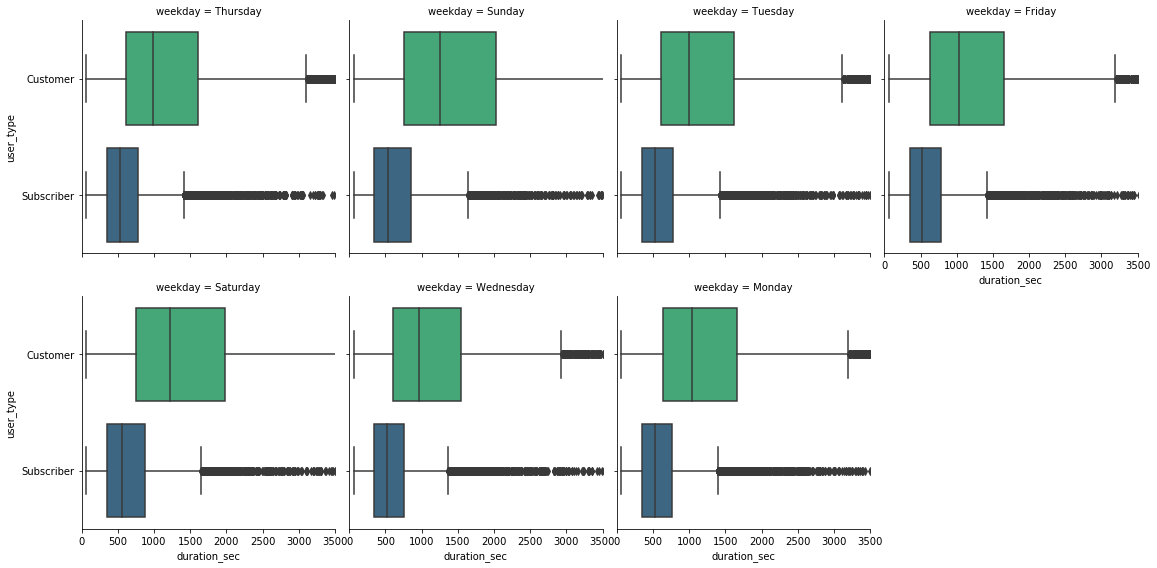

In [36]:
g=sb.FacetGrid(data=bike_sub,col='weekday',col_wrap=4,size=4);
g.map(sb.boxplot,'duration_sec','user_type',palette='viridis_r').set(xlim=(0,3500));

> **<span style="color:darkblue">Subscriber have a stable pattern above the week in ride duration while customer max duration vary between 1500 and 2000.**<br/>

#### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> **<span style="color:darkblue">Subscribers are more stable in data than customers over time.**